# Reproducible Reproduce on Customer Churn Data ~ From R to Python

We will be reproducing this project from R to Python wherein we will be doing Data analysis and create a model to predict the customer churn. Link to R project https://www.kaggle.com/code/rankirsh/do-you-feel-the-churn-visualisation-prediction . 

The project will be sub-divided into steps:
- Introduction and description of data
- Identifying relationships
- 
-
-
-
-


We will further improve this study by :
- Since our dataset has many predicting variables *(21)*, therefore we will identify the predictive power of the variables and selecting variables with a high predictive power to be used in our model. To achieve this we will use **Univariate Analysis technique** which analyzes the relationship between each individual variable and the target variable to assess the significance of the relationship.
-
-

In [193]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'white')
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image  
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report



In [194]:
# import the dataset
data = pd.read_csv("C:\\Users\\sjoshi6\\OneDrive - Biogen\\Desktop\\UNI\\RR\\Churn_data.csv")

In [195]:
# check first 5 columns of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Introduction


This part of the project, we will load our Churn dataset, and perform data cleaning including handle missing values and remove duplicates. This will prepare our dataset for further exploration and analysis.

In [196]:
# check the information of the whole dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The info() method gives basic information about our dataset i.e number of columns (21) and rows (7 043) as well as the datatypes (int64 & float64).

In [197]:
# statistical summary of numeric variables
data.describe(include ='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,4439-YRNVD,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [198]:
data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [199]:
#check missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [200]:
#data['TotalCharges'].isnull()
data[data['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 clients with tenure = 0. All the clients with missing values have a tenure of 0 which means that they are fresh clients who have yet to pay a bill so the value of TotalCharges should be 0 for them.

## Describe the data using Seaborn  and Matplotlib plots

## 1. Categorical Variables

In [201]:
# Identify Categorical variables

cat_vars = []
for column in data.columns:
    if data.dtypes[column] == 'object':  # Check if the data type is 'object'
        cat_vars.append(column)
        
print(cat_vars)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


We remove first column customerID and Total Charges which is a numeric variable.

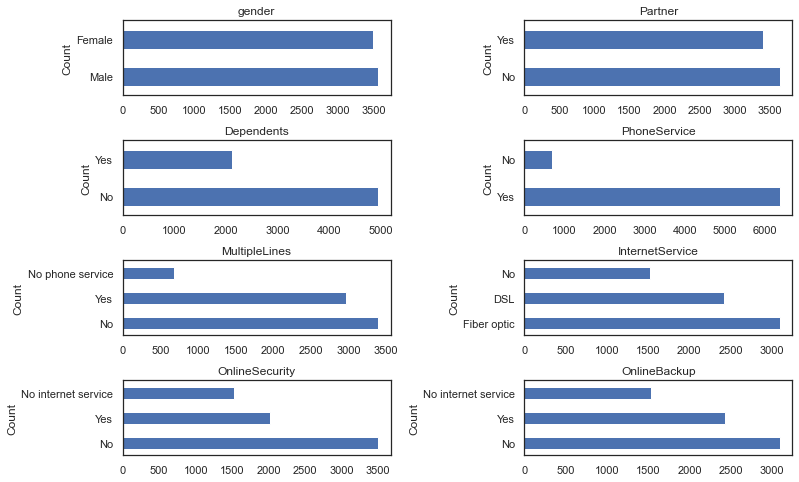

In [202]:
# Plots for categorical Variables

# Exclude the first variable and TotalCharges variables
cat_vars = [var for var in cat_vars if var not in ['customerID', 'TotalCharges']]  

cat_vars1 = cat_vars

n_rows = 4  # Number of subplot rows
n_cols = 2  # Number of subplot columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Iterate over the categorical variables and create the plots
for i, var in enumerate(cat_vars1[0:8]):
    ax = axes[i]  # Select the current subplot
    data[var].value_counts().plot(kind='barh', ax=ax)  # Plot the value counts as a bar chart
    ax.set_title(var)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove x-axis label to avoid clutter
    ax.set_ylabel('Count')  # Set y-axis label

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5) 

# Show the plots
plt.show()

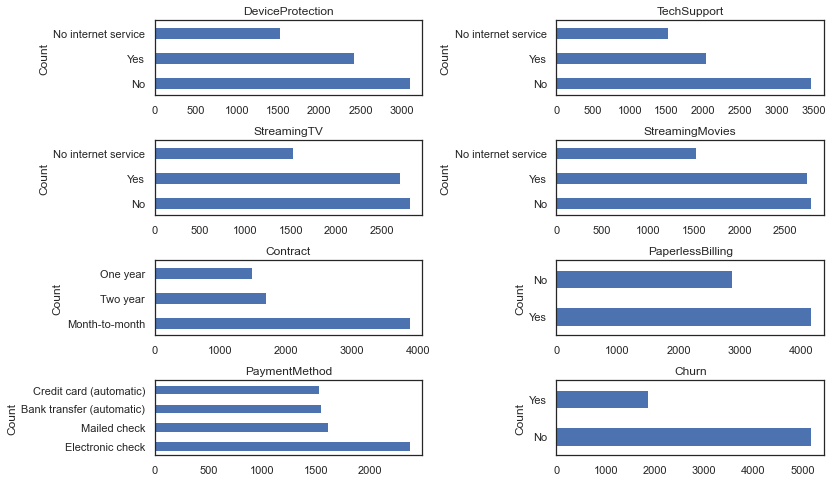

In [203]:
# Plots for categorical Variables
cat_vars2 = cat_vars  # Exclude the first variable and last 2 variables

n_rows = 4  # Number of subplot rows
n_cols = 2  # Number of subplot columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Iterate over the categorical variables and create the plots
for i, var in enumerate(cat_vars2[8:16]):
    ax = axes[i]  # Select the current subplot
    data[var].value_counts().plot(kind='barh', ax=ax)  # Plot the value counts as a bar chart
    ax.set_title(var)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove x-axis label to avoid clutter
    ax.set_ylabel('Count')  # Set y-axis label

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5) 

# Show the plots
plt.show()

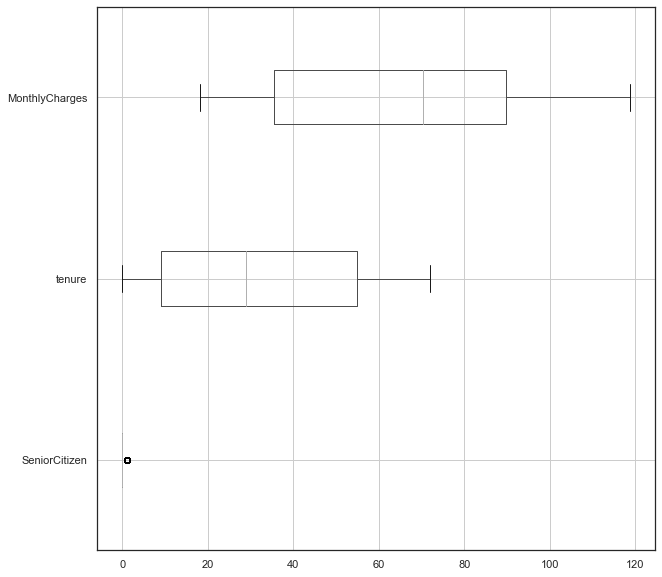

In [204]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.show()

### Interpertation of  Categorical Variables

- Gender and Partner are evenly distributed
- Most variables are almost evenly distributed with the exception of **Phone Service** where majority of clients have a Phone service
- Variable classification **"No Phone Service"** will be regarded as **No**

## 2. Numeric Variables

In [205]:
# Identify Numeric variables

num_vars = []
for column in data.columns:
    if data.dtypes[column] != 'object':  # Check if the data type is 'object'
        num_vars.append(column)
        
# Add variable total charges
num_vars += ['TotalCharges']
num_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [206]:
import pandas as pd

# Assuming your DataFrame is called 'df' and the churn column is named 'Churn'
churn_counts = data['Churn'].value_counts()
print(churn_counts)


No     5174
Yes    1869
Name: Churn, dtype: int64


Text(0.5, 1.0, 'Histogram Plot ~ Monthly Charges')

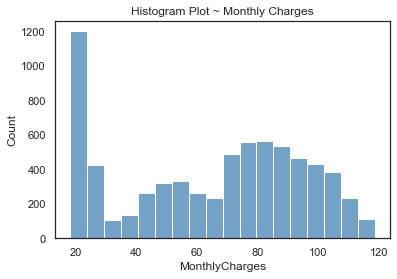

In [207]:
# plots for numeric variables
sns.histplot(data=data, x='MonthlyCharges', color='steelblue').set_title('Histogram Plot ~ Monthly Charges')

In [208]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [209]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


Text(0.5, 1.0, 'KdePlot ~ Total Charges')

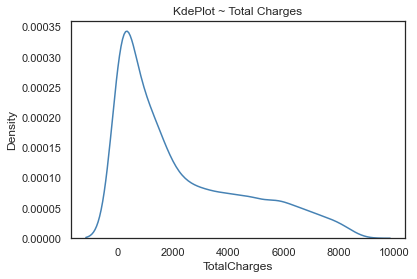

In [210]:
# total Charges
# remove non numeric values in Total Charges variable
#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#numeric_data = data[data['TotalCharges'].notnull()]

sns.kdeplot(data['TotalCharges'], color='steelblue').set_title('KdePlot ~ Total Charges')


Text(0.5, 1.0, 'Histogram Plot ~ tenure')

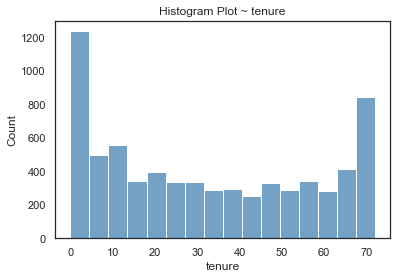

In [211]:
# tenure
sns.histplot(data=data, x='tenure', color='steelblue').set_title('Histogram Plot ~ tenure')

Text(0.5, 1.0, 'Count Plot ~ SeniorCitizen')

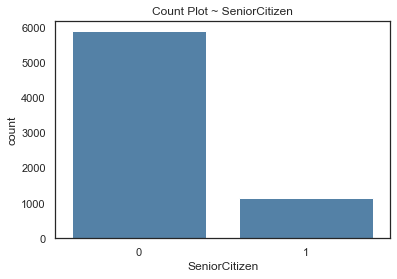

In [212]:
# tenure
sns.countplot(data=data, x='SeniorCitizen', color='steelblue').set_title('Count Plot ~ SeniorCitizen')

### Interpertation of  Numeric Variables

- using the kde plot, the distribution of **Total Charges** is skewed to right
- The distribution of citizens is imbalanced.

# Step 2 - Identifying relationships

Lets first check Churn vs Tenure

In [213]:
data.drop("customerID",axis=1,inplace = True)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


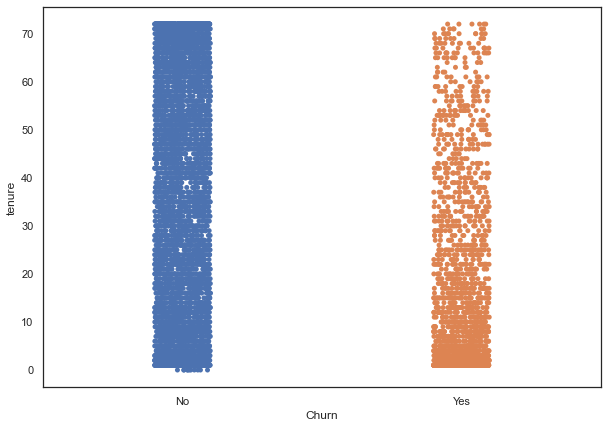

In [215]:
plt.figure(figsize=(10,7))
sns.stripplot(data["Churn"], data['tenure'], jitter=True)  ### Distribution of values
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


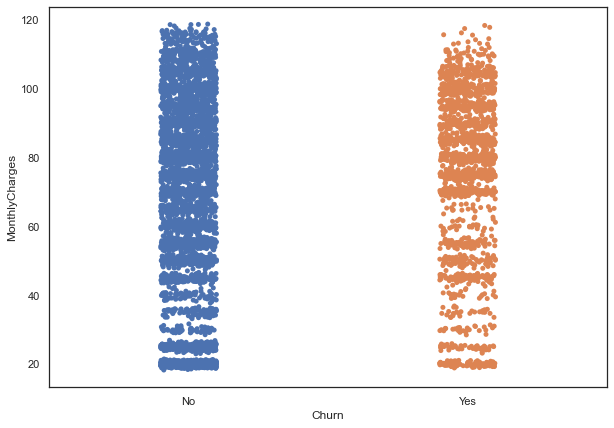

In [216]:
plt.figure(figsize=(10,7))
sns.stripplot(data["Churn"], data['MonthlyCharges'], jitter=True)  ### Distribution of values
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


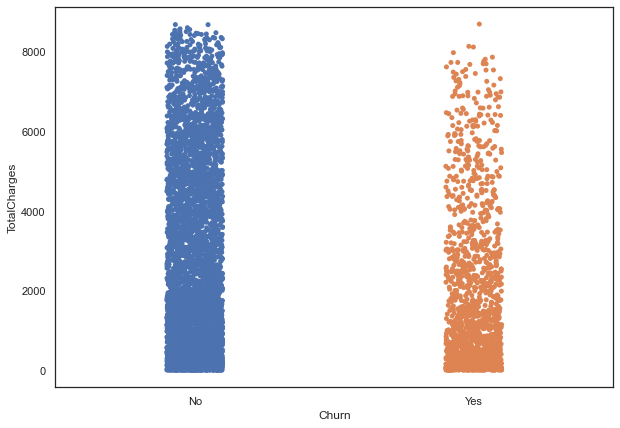

In [217]:
plt.figure(figsize=(10,7))
sns.stripplot(data["Churn"], data['TotalCharges'], jitter=True)  ### Distribution of values
plt.show()

In [218]:
#for cat in data.select_dtypes(include='object'):
    #data[cat] = data[cat].astype('category')

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [220]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [221]:
data.dropna(inplace = True)

In [222]:
catVariables = ["gender", "SeniorCitizen", "Partner", "Dependents","PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]


## Chi-square:

Chi-square is a statistical test that can be used to determine if there is a significant relationship between two categorical variables. It involves comparing the observed frequencies of each category in a contingency table to the expected frequencies, assuming that there is no relationship between the variables.

In [223]:
def chi_square_test(data, alpha=0.05):
    """
    Perform a chi-square test of independence on a contingency table and return the test result and interpretation.

    Parameters:
    data (list of lists): A contingency table of observed frequencies
    alpha (float): The significance level (default: 0.05)

    Returns:
    result (str): The test result and interpretation
    """

    # perform chi-square test
    stat, p, dof, expected = chi2_contingency(data)

    # interpret p-value
    if p <= alpha:
        result = f"Dependent (reject H0) with p-value {p:.6f}"
    else:
        result = f"Independent (H0 holds true) with p-value {p:.6f}"

    return result

In [224]:
# Import library for chi-square contingency test
from scipy.stats import chi2_contingency
for col in catVariables:
    # create a confusion matrix as a Pandas DataFrame
    confusion_matrix = pd.crosstab(data[col], data.Churn)

    # convert the DataFrame to a list of lists
    confusion_matrix_list = confusion_matrix.values.tolist()
    
    print(f"{col} & churn: ",chi_square_test(confusion_matrix_list, alpha=0.05))
    print()

gender & churn:  Independent (H0 holds true) with p-value 0.490488

SeniorCitizen & churn:  Dependent (reject H0) with p-value 0.000000

Partner & churn:  Dependent (reject H0) with p-value 0.000000

Dependents & churn:  Dependent (reject H0) with p-value 0.000000

PhoneService & churn:  Independent (H0 holds true) with p-value 0.349924

MultipleLines & churn:  Dependent (reject H0) with p-value 0.003568

InternetService & churn:  Dependent (reject H0) with p-value 0.000000

OnlineSecurity & churn:  Dependent (reject H0) with p-value 0.000000

OnlineBackup & churn:  Dependent (reject H0) with p-value 0.000000

DeviceProtection & churn:  Dependent (reject H0) with p-value 0.000000

TechSupport & churn:  Dependent (reject H0) with p-value 0.000000

StreamingTV & churn:  Dependent (reject H0) with p-value 0.000000

StreamingMovies & churn:  Dependent (reject H0) with p-value 0.000000



In [225]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


As we can see above, null hypothesis is rejected for most of the categorical variables except Gender and PhoneService which means churn is independent when it comes to PgoneService and Gender.

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [227]:
data.drop(['gender', 'PhoneService',], inplace=True, axis=1)

In [228]:
# Identify Categorical variables

cat_vars = []
for column in data.columns:
    if data.dtypes[column] == 'object':  # Check if the data type is 'object'
        cat_vars.append(column)
        
print(cat_vars)

['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [229]:
cat1 = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [230]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        print('\n')
        print('Feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



Feature: Partner
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


Feature: Dependents
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Feature: MultipleLines
['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']
[1 0 2]


Feature: InternetService
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
[0 1 2]


Feature: OnlineSecurity
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[0 2 1]


Feature: OnlineBackup
['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[2 0 1]


Feature: DeviceProtection
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[0 2 1]


Feature: TechSupport
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
[0 2 1]


Feature: StreamingTV
['No', 'Yes', 'No internet service']
Categories (3, o

In [231]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

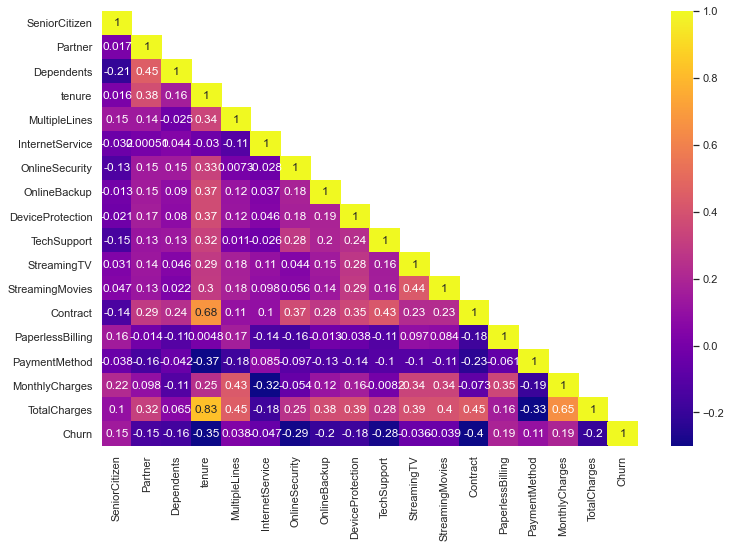

In [232]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,mask=np.triu(data.corr(),+1),cmap='plasma',vmin=-0.3,vmax=1)

In [233]:
# Copy all the predictor variables into X dataframe
X = data.drop('Churn', axis=1)

# Copy target into the y dataframe.  
y = data['Churn']

In [234]:
X

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,1,1,72,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,1,1,11,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,0,4,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regressor Model

In [236]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))


NameError: name 'regression_model' is not defined

In [238]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [239]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

### Logistic Regression model

In [240]:
# Fit the Logistic Regression model
logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logistic_model.fit(X_train, y_train)

C:\Users\sjoshi6\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [241]:
ytrain_predict = logistic_model.predict(X_train)
ytest_predict = logistic_model.predict(X_test)

In [242]:
ytest_predict_prob=logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.997574,0.002426
1,0.266792,0.733208
2,0.916467,0.083533
3,0.343402,0.656598
4,0.534582,0.465418


In [243]:
#Train Data Accuracy
logistic_train_acc=logistic_model.score(X_train,y_train) 
logistic_train_acc

0.8026166097838453

In [244]:
#Test Data Accuracy
logistic_test_acc=logistic_model.score(X_test, y_test)
logistic_test_acc

0.8026166097838453

In [245]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3869
           1       0.66      0.54      0.60      1405

    accuracy                           0.80      5274
   macro avg       0.75      0.72      0.73      5274
weighted avg       0.79      0.80      0.80      5274



In [246]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.65      0.53      0.59       464

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758



In [247]:
logistic_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_train_f1=round(df.loc["1"][2],2)
logistic_train_recall=round(df.loc["1"][1],2)
logistic_train_precision=round(df.loc["1"][0],2)
print ('logistic_train_precision ',logistic_train_precision)
print ('logistic_train_recall ',logistic_train_recall)
print ('logistic_train_f1 ',logistic_train_f1)

logistic_train_precision  0.66
logistic_train_recall  0.54
logistic_train_f1  0.6


In [248]:
logistic_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_test_f1=round(df.loc["1"][2],2)
logistic_test_recall=round(df.loc["1"][1],2)
logistic_test_precision=round(df.loc["1"][0],2)
print ('logistic_test_precision ',logistic_test_precision)
print ('logistic_test_recall ',logistic_test_recall)
print ('logistic_test_f1 ',logistic_test_f1)

logistic_test_precision  0.65
logistic_test_recall  0.53
logistic_test_f1  0.59


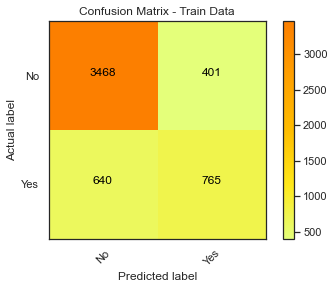

In [249]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title('Confusion Matrix - Train Data')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i][j]), horizontalalignment="center", color="black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_train, ytrain_predict)
class_names = ['No', 'Yes']
plot_confusion_matrix(cm, class_names)


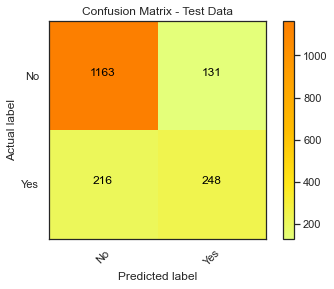

In [250]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title('Confusion Matrix - Test Data')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i][j]), horizontalalignment="center", color="black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, ytest_predict)
class_names = ['No', 'Yes']
plot_confusion_matrix(cm, class_names)

In [251]:

from imblearn.over_sampling import SMOTE


In [252]:
sm = SMOTE(random_state=2)


In [253]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [254]:
## Let's check the shape after SMOTE
X_train_res.shape

(7738, 17)

In [255]:
logistic_model.fit(X_train_res, y_train_res)

C:\Users\sjoshi6\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [256]:
ytrain_predict = logistic_model.predict(X_train_res)
ytest_predict = logistic_model.predict(X_test)

In [257]:
ytest_predict_prob=logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.999062,0.000938
1,0.229185,0.770815
2,0.627734,0.372266
3,0.142185,0.857815
4,0.267471,0.732529


In [258]:
#Train Data Accuracy
logistic_train_acc_res=logistic_model.score(X_train_res,y_train_res) 
logistic_train_acc_res

0.7947790126647712

In [259]:
#Test Data Accuracy
logistic_test_acc_res=logistic_model.score(X_test, y_test)
logistic_test_acc_res

0.7497155858930603

In [260]:
print(classification_report(y_train_res, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.75      0.78      3869
           1       0.77      0.84      0.80      3869

    accuracy                           0.79      7738
   macro avg       0.80      0.79      0.79      7738
weighted avg       0.80      0.79      0.79      7738



In [261]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1294
           1       0.52      0.77      0.62       464

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.80      0.75      0.76      1758



### LDA Model

In [262]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)

In [263]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = lda_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = lda_model.predict(X_test)

In [264]:
ytest_predict_prob=lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.978066,0.021934
1,0.192921,0.807079
2,0.894388,0.105612
3,0.278726,0.721274
4,0.480101,0.519899


In [265]:
#Train Data Accuracy
lda_train_acc=lda_model.score(X_train,y_train) 
lda_train_acc

0.7961698900265454

In [266]:
lda_test_acc=lda_model.score(X_test, y_test)
lda_test_acc

0.7952218430034129

In [267]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3869
           1       0.64      0.53      0.58      1405

    accuracy                           0.80      5274
   macro avg       0.74      0.71      0.72      5274
weighted avg       0.79      0.80      0.79      5274



In [268]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1294
           1       0.63      0.54      0.58       464

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [269]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.64
lda_train_recall  0.53
lda_train_f1  0.58


In [270]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.63
lda_test_recall  0.54
lda_test_f1  0.58


### LDA with Smote

In [271]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train_res, y_train_res)

In [272]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = lda_model.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = lda_model.predict(X_test)

In [273]:
ytest_predict_prob=lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.990082,0.009918
1,0.150722,0.849278
2,0.504844,0.495156
3,0.079720,0.920280
4,0.192512,0.807488


In [274]:
#Train Data Accuracy
lda_train_acc=lda_model.score(X_train_res,y_train_res) 
lda_train_acc

0.7876712328767124

In [275]:
lda_test_acc=lda_model.score(X_test, y_test)
lda_test_acc

0.7383390216154722

In [276]:
print(classification_report(y_train_res, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77      3869
           1       0.76      0.85      0.80      3869

    accuracy                           0.79      7738
   macro avg       0.79      0.79      0.79      7738
weighted avg       0.79      0.79      0.79      7738



In [277]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1294
           1       0.50      0.78      0.61       464

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.74      0.75      1758



### Decision Tree

In [278]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTree.fit(X_train_res,y_train_res)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [279]:
print(dTree.score(X_train_res,y_train_res))
print(dTree.score(X_test, y_test))

0.7923235978288964
0.7434584755403868


In [280]:
train_char_label = ['No', 'Yes']
vote_Tree_File = open('vote_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=vote_Tree_File, feature_names = list(X_train_res), class_names = list(train_char_label))
vote_Tree_File.close()

In [281]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train_res.columns))

                       Imp
SeniorCitizen     0.000234
Partner           0.028651
Dependents        0.000000
tenure            0.000000
MultipleLines     0.000000
InternetService   0.000000
OnlineSecurity    0.131148
OnlineBackup      0.003949
DeviceProtection  0.000000
TechSupport       0.059466
StreamingTV       0.000000
StreamingMovies   0.000000
Contract          0.691883
PaperlessBilling  0.000000
PaymentMethod     0.000000
MonthlyCharges    0.072693
TotalCharges      0.011977


In [282]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = dTree.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = dTree.predict(X_test)

In [283]:
print(classification_report(y_train_res, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      3869
           1       0.77      0.83      0.80      3869

    accuracy                           0.79      7738
   macro avg       0.79      0.79      0.79      7738
weighted avg       0.79      0.79      0.79      7738



In [284]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1294
           1       0.51      0.73      0.60       464

    accuracy                           0.74      1758
   macro avg       0.70      0.74      0.71      1758
weighted avg       0.79      0.74      0.76      1758

